In [1]:
import os
import sys

print("Current working directory:", os.getcwd())
parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to Python path")
else:
    print(f"{parent_dir} already in Python path")

Current working directory: /Users/jinceyang/Desktop/codebase/ml/learn_d2l/chap8
Added /Users/jinceyang/Desktop/codebase/ml/learn_d2l to Python path


In [2]:
import importlib
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import numpy as np

import importlib
from d2l.classification.model import DenseNetClassifier
from d2l.classification.dataset import FashionMNISTDataset
from d2l.base.trainer import Trainer
from d2l.base.evaluator import ClassificationEvaluator
from d2l.base.optimizer import SGDOptimizer
from d2l.base.plot import plot_loss, show_images, plot_losses
from d2l.base.utils import mps
from typing import List
from matplotlib import pyplot as plt
import torch
import numpy as np

from d2l.base.function import corr2d, corr2d_multi_in, corr2d_multi_in_out, corr2d_multi_in_out_1x1, comp_conv2d, max_pool2d, avg_pool2d

In [3]:
rng = torch.Generator().manual_seed(42)

In [4]:
data = FashionMNISTDataset()
train_data_loader = data.get_train_dataloader(batch_size=10)
train_iter = iter(train_data_loader)
X, y = next(train_iter)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: torch.Size([10, 1, 28, 28])
y shape: torch.Size([10])


In [5]:
densenet = DenseNetClassifier(
    num_outputs=10,
    rng=rng
)

densenet.init((10, 1, 28, 28))
densenet.layer_summary((10, 1, 28, 28))

              Conv2d  input shape: torch.Size([10, 1, 28, 28])
              Conv2d  output shape: torch.Size([10, 32, 14, 14])
         BatchNorm2d  input shape: torch.Size([10, 32, 14, 14])
         BatchNorm2d  output shape: torch.Size([10, 32, 14, 14])
                ReLU  input shape: torch.Size([10, 32, 14, 14])
                ReLU  output shape: torch.Size([10, 32, 14, 14])
           MaxPool2d  input shape: torch.Size([10, 32, 14, 14])
           MaxPool2d  output shape: torch.Size([10, 32, 7, 7])
          DenseBlock  input shape: torch.Size([10, 32, 7, 7])
          DenseBlock  output shape: torch.Size([10, 64, 7, 7])
     TransitionBlock  input shape: torch.Size([10, 64, 7, 7])
     TransitionBlock  output shape: torch.Size([10, 32, 3, 3])
          DenseBlock  input shape: torch.Size([10, 32, 3, 3])
          DenseBlock  output shape: torch.Size([10, 64, 3, 3])
     TransitionBlock  input shape: torch.Size([10, 64, 3, 3])
     TransitionBlock  output shape: torch.Size([10

In [6]:
def eval_on_epoch(model, epoch_id, batch_losses):
    evaluator = ClassificationEvaluator(model)
    loss = evaluator.loss(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation loss {loss:.4f}')
    accuracy = evaluator.accuracy(data.get_test_dataloader(batch_size=data.test_size))
    print(f'Epoch {epoch_id}, validation accuracy {accuracy:.4f}')

In [7]:
trainer = Trainer(
    model=densenet, 
    optimizer=torch.optim.Adam(densenet.net.parameters(), lr=0.005),
    on_train_epoch_end=eval_on_epoch
)

Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 0, validation loss 0.4516
Epoch 0, validation accuracy 0.8365


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 1, validation loss 0.3553
Epoch 1, validation accuracy 0.8670


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 2, validation loss 0.3470
Epoch 2, validation accuracy 0.8711


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 3, validation loss 0.3224
Epoch 3, validation accuracy 0.8826


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 4, validation loss 0.2992
Epoch 4, validation accuracy 0.8857


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 5, validation loss 0.2922
Epoch 5, validation accuracy 0.8980


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 6, validation loss 0.3364
Epoch 6, validation accuracy 0.8743


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 7, validation loss 0.2952
Epoch 7, validation accuracy 0.8922


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 8, validation loss 0.2704
Epoch 8, validation accuracy 0.9027


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch 9, validation loss 0.2727
Epoch 9, validation accuracy 0.9027


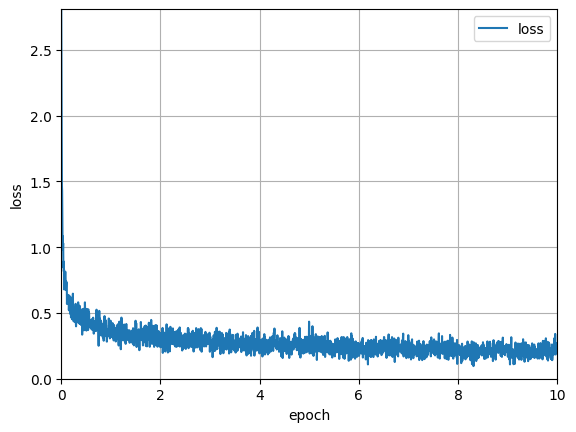

In [8]:
epoch_losses = trainer.train(
    data.get_train_dataloader_epochs(batch_size=256, num_epochs=10)
)
fig, ax = plt.subplots()
plot_loss(ax, epoch_losses)

In [9]:
evaluator = ClassificationEvaluator(densenet)
test_loss = evaluator.loss(data.get_test_dataloader(data.test_size))
print(f'Test loss: {test_loss:.4f}')
accuracy = evaluator.accuracy(data.get_test_dataloader(data.test_size))
print(f'Test accuracy: {accuracy:.2%}')

Test loss: 0.2727
Test accuracy: 90.27%


In [10]:
# save the models
densenet.save('densenet.pth')